# Project: Investigating TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report contains a prief analysis of a TMDb movie dataset. The dataset contains information about 10,000 movies, including user ratings, revenue, and more.

This analysis aim to answer the following questions. What is the most popular genere? Who is the most active actor? What is the relation between budget and year?

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [114]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [116]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning

#### Remove Duplicate Rows

In [117]:
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

#### Fixing "release_date" Format

In [118]:
df['release_date'] = pd.to_datetime(df['release_date'])
df.dtypes

id                               int64
imdb_id                         object
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### Drop unnecessary columns

In [119]:
unnecessary = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj']
df.drop(unnecessary, axis=1, inplace=True)
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015


#### Discard Rows Having Zero in Budget and Revenue

In [120]:
df['budget'] = df['budget'].replace(0, np.nan)
# df['revenue'] = df['revenue'].replace(0, np.nan)
df.dropna(inplace=True)
df.shape

(5153, 11)

<a id='eda'></a>
## Exploratory Data Analysis

### What is the most popular genere?

In [121]:
def count(string):
    seprator = df[string].str.cat(sep = '|')
    seprator = pd.Series(seprator.split('|'))
    return seprator.value_counts()

Text(0, 0.5, 'Genres')

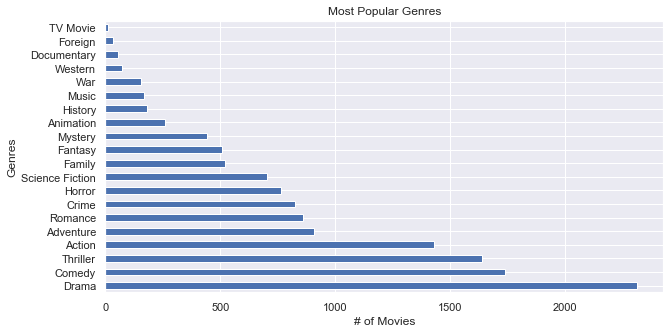

In [122]:
genres_list = count('genres')
genres_list.plot.barh(figsize = (10, 5))
plt.title('Most Popular Genres')
plt.xlabel('# of Movies')
plt.ylabel('Genres')

We can see clearly that the drama is the most popular genre

### Who is the most active actor?

Text(0, 0.5, 'Actors')

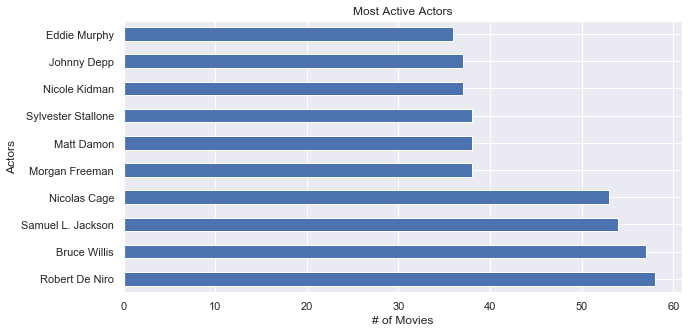

In [123]:
actors = count('cast')
# We need the top 10 only
actors = actors.iloc[:10]
actors.plot.barh(figsize = (10, 5))
plt.title('Most Active Actors')
plt.xlabel('# of Movies')
plt.ylabel('Actors')

### What is the relation between budget and year?

Text(0, 0.5, 'Budget')

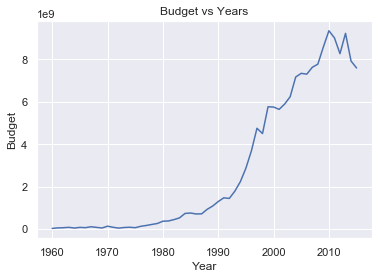

In [124]:
df.groupby('release_year')['budget'].sum().plot()

plt.title('Budget vs Years')
plt.xlabel('Year')
plt.ylabel('Budget')

#### Scatterplot

Text(0, 0.5, 'Budget')

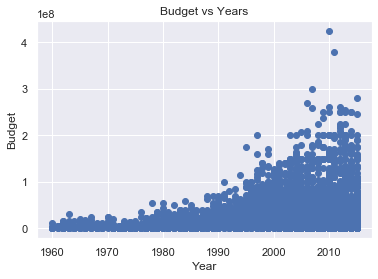

In [125]:
plt.scatter(x=df['release_year'], y=df['budget'])
plt.title('Budget vs Years')
plt.xlabel('Year')
plt.ylabel('Budget')

We can say confidently that the budget needed for making a movie is increasing over the years

<a id='conclusions'></a>
## Conclusions

After answering the analysis questions we can summarize the analysis with the following:
<ul>
    <li>Over the years, the drama genre is the most popular genre.</li>
    <li>Active actors participated in more than 45 movie.</li>
    <li>Robert De Niro is the most active actor with more than 70 participation.</li>
    <li>Movie budget is increasing over the years</li>
</ul>

#### Limitations
<ul>
    <li>
        The data was cut significantly because the zeros' in budget which makes the data not the most accurate when the budget involve's.
    </li>
    <li>
        The data may cut even more when removing tuples with zero in revneue which also will be much bigger problem.
    </li>
    
</ul>